# Modélisation de mécanismes réactionnels : cas des réactions successives

Dans un réacteur batch (cuve) on suit la transformation chimique de l'espèce $A$ en l'espèce $B$ selon la réaction totale suivante :
\begin{equation}
    A \xrightarrow{k_1} B,
\end{equation}
et $B$ se décompose également en une espèce $C$ selon la réaction totale :
\begin{equation}
    B \xrightarrow{k_2} C.
\end{equation}
$k_1$ = 0,02 s$^{-1}$ et $k_2$ = 0,01 s$^{-1}$ sont les constantes de vitesse de ces réactions dans les conditions expérimentales.

**On désire :**
+ calculer numériquement l'évolution temporelle des concentrations en $A$, $B$ et $C$ : $c_A(t)$, $c_B(t)$, $c_C(t)$
+ déterminer au bout de quelle durée de réaction $t_{max}$ la concentration en $B$ est maximale ${c_B}_{max}$.

A l'aide de bilans matière et des expressions des lois de vitesse (en supposant des mécanismes simples), on établit les relations couplées suivantes :

$\frac{d c_A}{dt} = -k_1 c_A$

$\frac{d c_B}{dt} = k_1 c_A - k_2 c_B$

$\frac{d c_C}{dt} = k_2 c_B$

associées aux conditions initiales :

$c_A(0)$ = 1 mM

$c_B(0)$ = 0

$c_C(0)$ = 0

**Nous allons calculer numériquement $c_A(t)$, $c_B(t)$ et $c_C(t)$ sur l'intervalle de temps [0, 650 s])**


## Système d'ODE
Pour cela on utilise la fonction odeint du module scipy.integrate. Cette fonction intègre des ODE de la forme :
\begin{equation}
    \frac{dY}{dt} = F(Y,t).
\end{equation}


$Y$ peut être un vecteur, c'est à dire contenir plusieurs éléments. Autrement dit, l'équation précédente peut correspondre à plusieurs ODE couplées et **c'est justement le cas ici**.

En fait le système d'équations à résoudre peut se mettre sous la forme :

\begin{align}
     \frac{d}{dt} & \begin{bmatrix}  
                        c_A \\            
                        c_B \\            
                        c_C               
                     \end{bmatrix} = 
                     \begin{bmatrix}
                         -k_1 c_A \\
                         k_1 c_A - k_2 c_B \\
                         k_2 c_B
                     \end{bmatrix}.
\end{align}

En définissant le vecteur $Y$ comme :
\begin{align}
     Y & = \begin{bmatrix}  
                        c_A \\            
                        c_B \\            
                        c_C               
                     \end{bmatrix}
\end{align}
On peut ré-écrire le système des 3 équations sous la forme d'une seule équation :
\begin{equation}
    \frac{dY}{dt} = F(Y,t),
\end{equation}
où $F$ est également un vecteur donné par :
\begin{align}
     F & = \begin{bmatrix}  
                        -k_1 Y(1) \\            
                        k_1 Y(1) - k_2 Y(2) \\            
                        k_2 Y(2)               
                     \end{bmatrix},
\end{align}
avec $Y(1) = c_A$, $Y(2) = c_B$ et $Y(3) = c_C$.

La fonction odeint peut intégrer un tel système d'ODE, on pourra y faire appel une seule fois pour tout résoudre. Cependant, contrairement aux cas où il y a une seule équation à résoudre, il faudra faire passer correctement en argument, à odeint, **la fonction décrivant le système d'ODE** et **les conditions initiales**. 

# Définition de la fonction décrivant le système d'ODE

+ le vecteur Y (qui comprendra 3 éléments)
+ le temps t

qui calcule les dérivées :
+ $-k_1 c_A$ 
+ $k_1 c_A - k_2 c_B$
+ $k_2 c_B$

et qui renvoie ces 3 valeurs de dérivées



In [1]:
from pylab import *

k1 = 0.02
k2 = 0.01

def dF(Y,t):
    val1 = -k1*Y[0]
    val2 = +k1*Y[0] - k2*Y[1]
    val3 = +k2*Y[1]
    return val1, val2, val3



Y0 = array([1,0,0])
dY0 = dF(Y0,0)

print("dcAdt(0)=",dY0[0],'mol/s/m^3')
print("dcBdt(0)=",dY0[1],'mol/s/m^3')
print("dcCdt(0)=",dY0[2],'mol/s/m^3')

dcAdt(0)= -0.02 mol/s/m^3
dcBdt(0)= 0.02 mol/s/m^3
dcCdt(0)= 0.0 mol/s/m^3


# Utilisation de odeint et représentation des résultats
**Utiliser odeint** avec la fonction que vous avez créée pour résoudre le systéme d'équations et obtenir $c_A(t)$, $c_B(t)$ et $c_C(t)$ sur l'interavalle de temps [0, 2000 s].

Petites précisions :
+ Les 3 conditions initiales doivent être passées en argument à odeint sous forme d'une liste (ou d'un tableau)
+ La variable renvoyée par odeint (résutlat du calcul) est un tableau, pour accéder au premier élément de $Y$, il faudra sélectionner la première colonne de ce tableau.

**Sur une même figure**, tracer $c_A(t)$, $c_B(t)$ et $c_C(t)$, y inclure une légende et les noms des axes 

**Déterminer les valeurs de $t_{max}$ et ${c_B}_{max}$** et les représenter sur la figure.

**Rajouter le tracé** de la quantité $c_A(t)+ c_B(t)+c_C(t)$, pour vérifier que la résolution numérique est conservative.

tmax = 69.30386077215444
cb_max = 0.4999999996023026


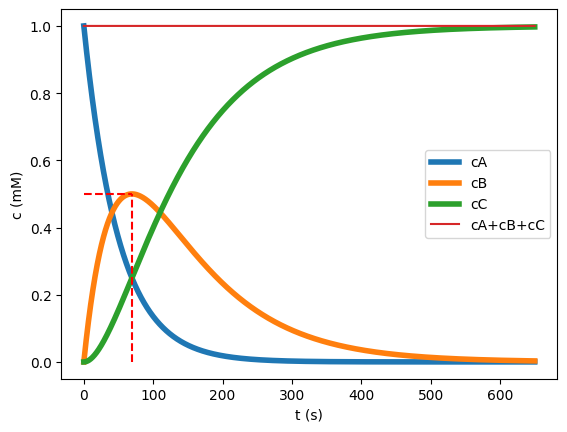

In [2]:
from scipy.integrate import odeint

t_ = linspace(0,650,5000)
sol = odeint(dF,[1,0,0],t_)

ca = sol[:,0]
cb = sol[:,1]
cc = sol[:,2]

i = argmax(cb)
t_max = t_[i]
cb_max = cb[i]
print("tmax =", t_max )
print("cb_max =", cb_max )

figure()
plot(t_,ca,label="cA",linewidth=4)
plot(t_,cb,label="cB",linewidth=4)
plot(t_,cc,label="cC",linewidth=4)
plot([t_max, t_max],[0,cb_max],'r--')
plot([0, t_max],[cb_max, cb_max],'r--')
plot(t_,ca+cb+cc,label="cA+cB+cC")
xlabel('t (s)')
ylabel('c (mM)')
legend()

In [4]:
# verif formule tmax
print('tmax=', log(k1/k2)/(k1-k2))

tmax= 69.31471805599453
